In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
mpl.rcParams['figure.dpi'] = 300

%run backwards_time_voter_model.ipynb

In [41]:
L = 200
alpha = 1e-3
kernel = 'fat tail'
W = 5
eta = -6

species = voter_model_fast(L, alpha, kernel=kernel, W=W, eta=eta)

  5%|▍         | 1963/40000 [00:02<00:45, 832.87it/s] 


In [42]:
species_ids = np.random.uniform(size=len(species))
print(len(species))

grid = np.zeros((L, L))
for i, specie in enumerate(species):
    for coord in specie:
        grid[coord] = species_ids[i]



40


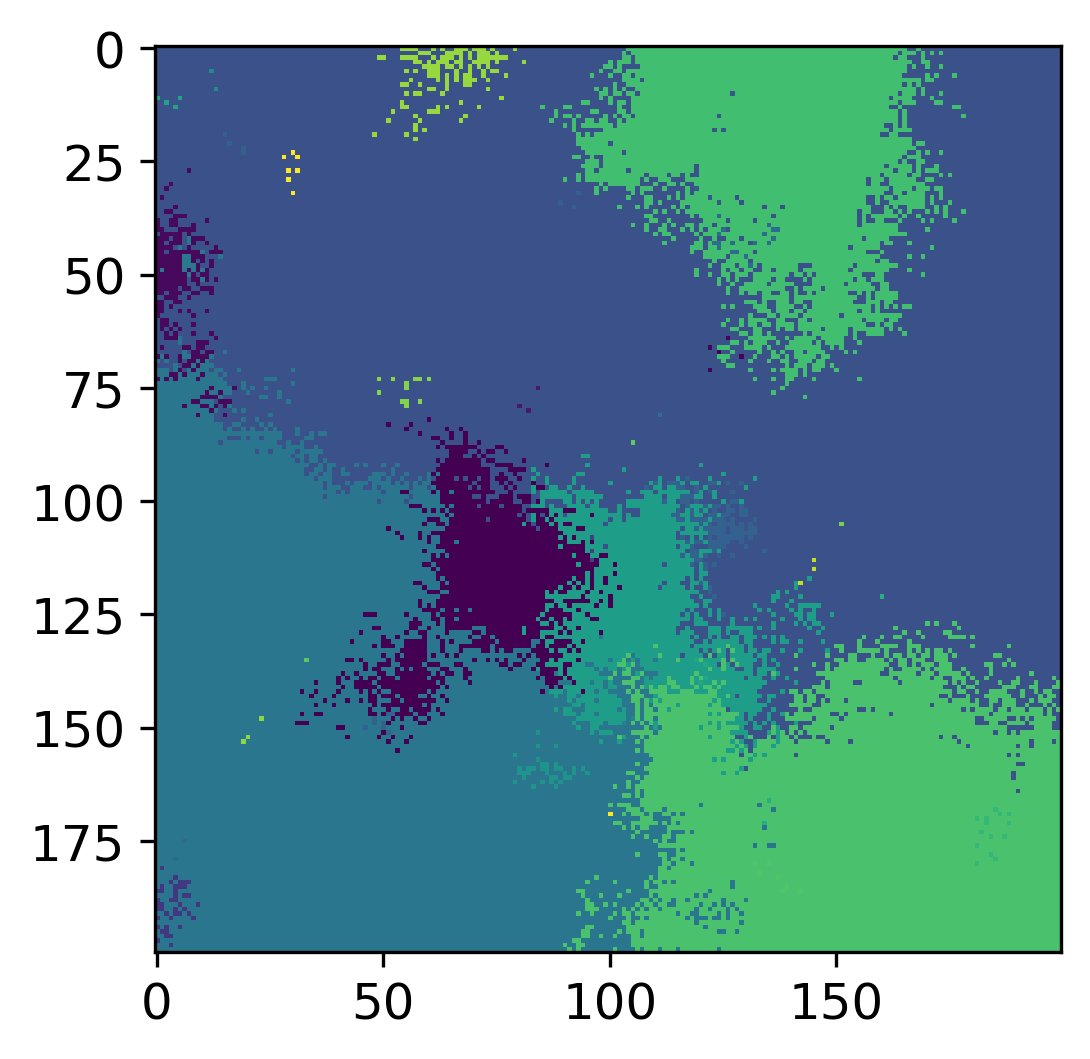

In [43]:
plt.imshow(grid)
plt.show()

[ 0.51313523 -1.29039163]


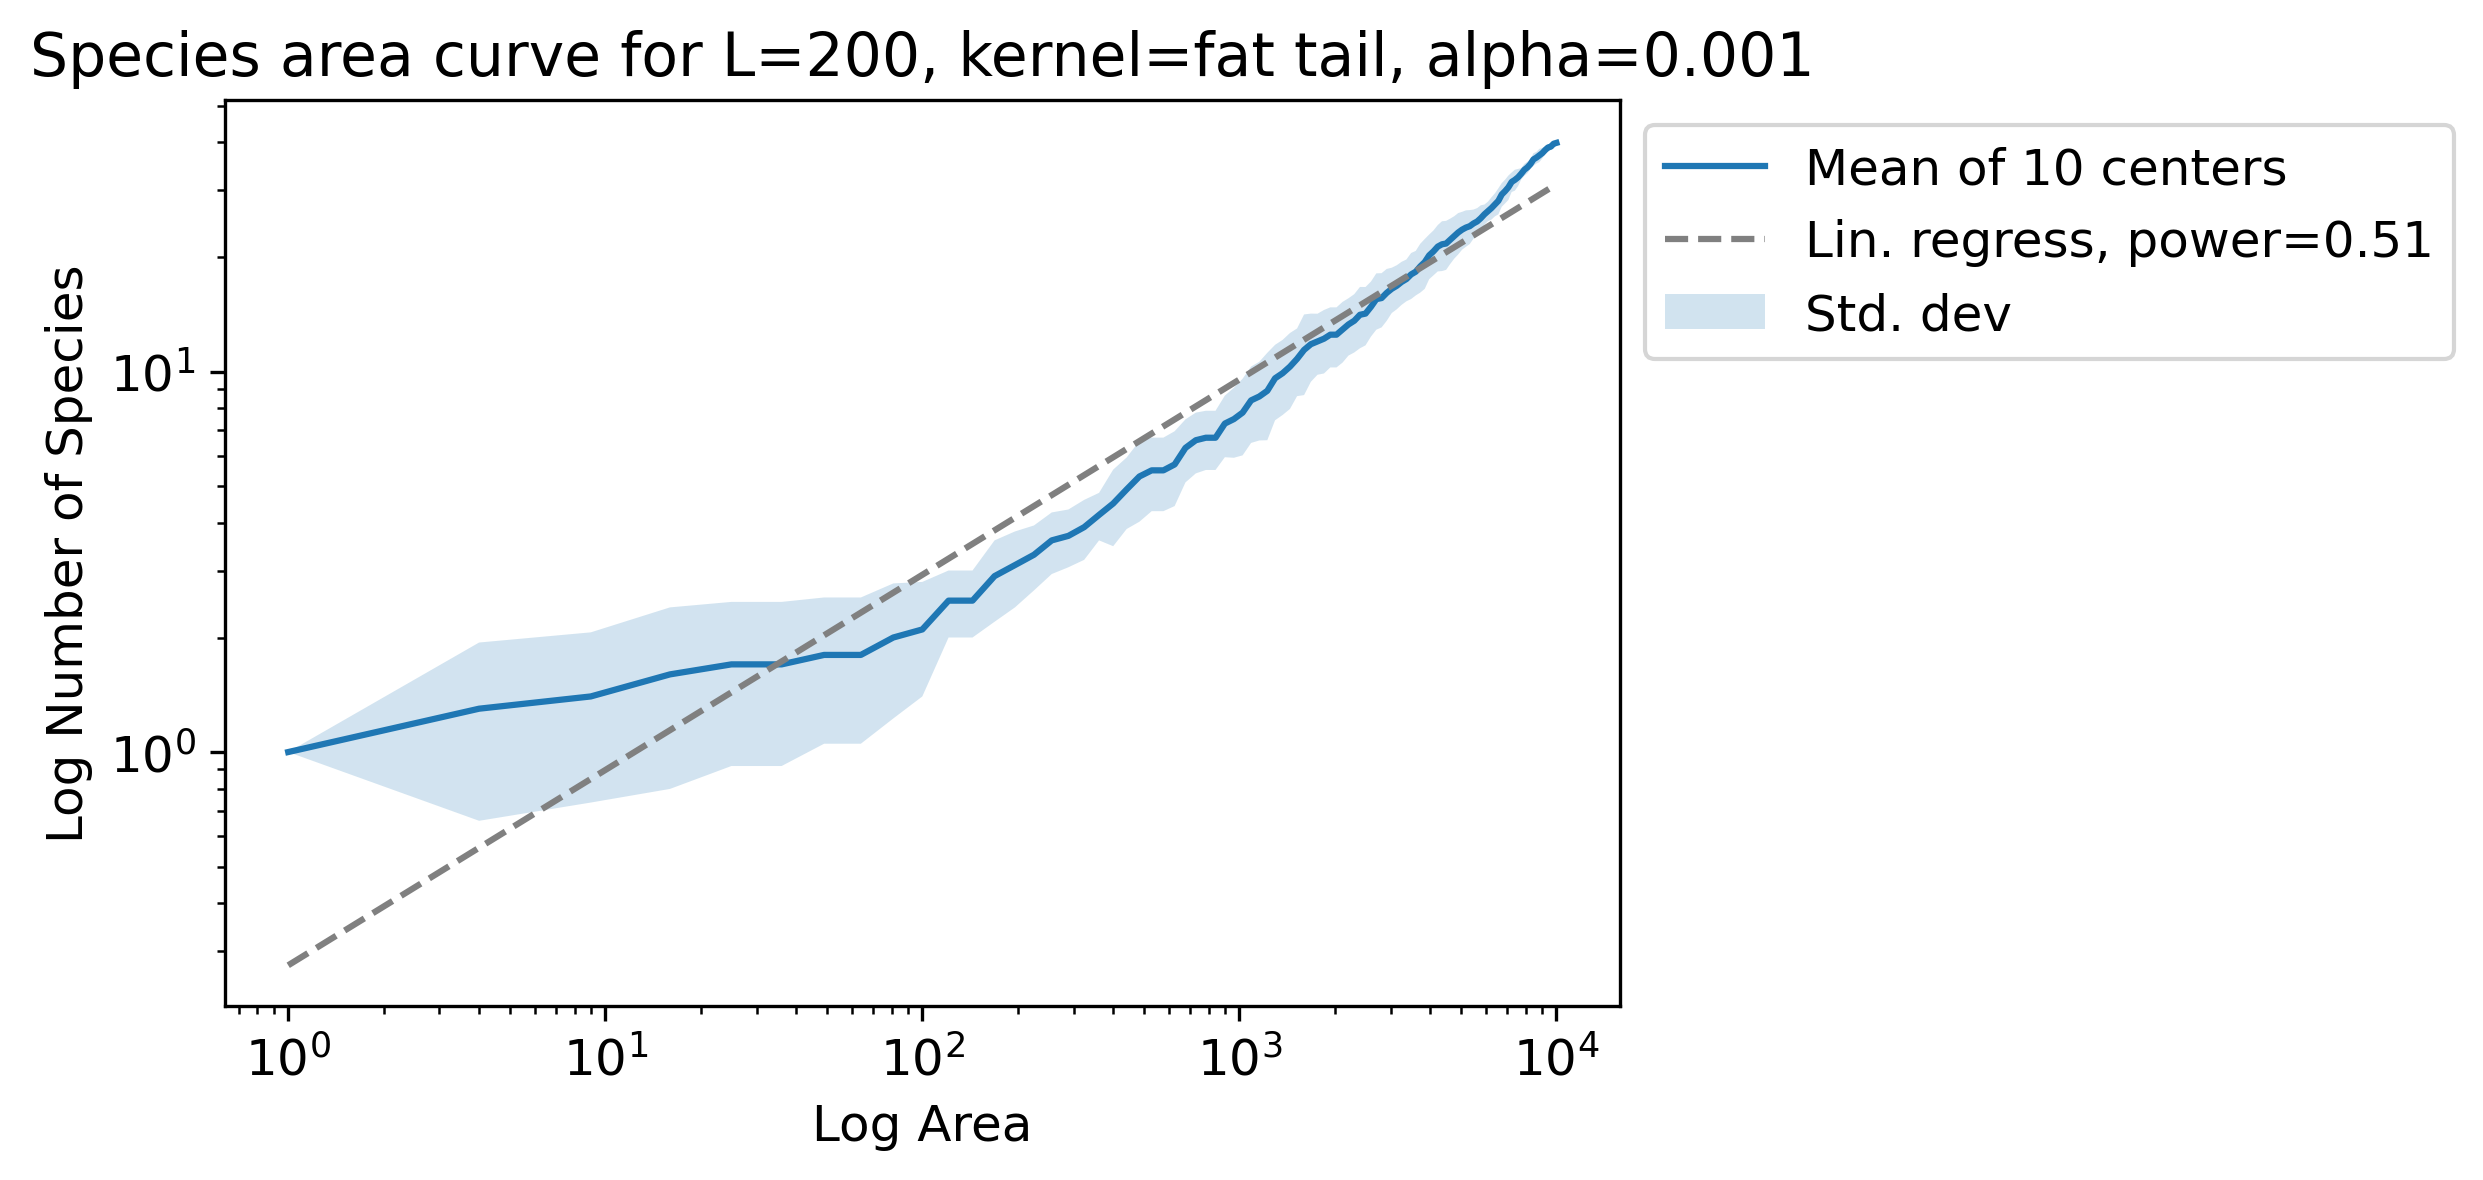

In [44]:
areas, num_species = sa_curve(grid)
spec_std_dev = np.std(num_species, axis=0)
spec_mean = np.mean(num_species, axis=0)

poly_coeffs = np.polyfit(np.log(areas), np.log(spec_mean), 1)
print(poly_coeffs)

plt.loglog(areas, list(spec_mean), label=f'Mean of 10 centers')
plt.loglog([areas[0], areas[-1]], 
        np.exp(poly_coeffs[1]) * np.array([areas[0], areas[-1]])**poly_coeffs[0], 
        color='grey', 
        linestyle='dashed',
        label=f'Lin. regress, power={round(poly_coeffs[0], 2)}')
plt.fill_between(areas, spec_mean-spec_std_dev, spec_mean+spec_std_dev, alpha=0.2, label=f'Std. dev')

plt.ylabel('Log Number of Species')
plt.xlabel('Log Area')
plt.title(f'Species area curve for L={L}, kernel={kernel}, alpha={alpha}')
plt.legend(bbox_to_anchor=(1,1))
plt.show()